In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import *
import time
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
import math
import scipy
from scipy.special import expit

In [2]:
df = pd.read_excel("C:/Users/msi 1/Downloads/datas.xls")
Z = df.values
Y1 = Z[:,24]
T= np.delete(Z, 24, 1)
X1 = np.ones((14635,1))
X1 = np.append(X1, T, axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X1, Y1, random_state=0, test_size = 0.2, shuffle=True, stratify = Y1)
X1 = X1.T
X_train = X_train.T
X_test = X_test.T
Y_train = Y_train.T
Y_test = Y_test.T
X1_train = np.array_split(X_train, 5, axis=1)
Y1_train = np.array_split(Y_train, 5)
X1_test = np.array_split(X_test, 5, axis=1)
Y1_test = np.array_split(Y_test, 5)

In [3]:
# Define perceptron model, which gives us the predicted value of input
# 1. Weighted sum    2. Activation function (step function here)     g(xTw+d)

def perceptron_model_sign(x,w):             # x - one of the example, w - weight, d - intercept 
    # weighted sum
    #weighted_sum = 0
    #for i in range(len(w)):
    weighted_sum = np.dot(w,x)
        
    # Activation Function
    y = np.sign(weighted_sum)
    # = np.clip(weighted_sum, 1e-7, 1-1e-7)
    #y_clip = 1/(1-np.exp(-weighted_sum))
    return y

In [4]:
def perceptron_model_sigmoid(x,w):
    weighted_sum = np.dot(w,x)
    y = expit(weighted_sum)
    #y = 1/(1 + np.exp(-weighted_sum))
    if y>=0.5:
        return 1
    else:
        return -1

In [5]:
def perceptron_model_tanh(x,w):
    weighted_sum = np.dot(w,x)
    #return np.sign((np.exp(weighted_sum) - np.exp(-weighted_sum))/(np.exp(weighted_sum) + np.exp(-weighted_sum)))
    return np.sign(math.tanh(weighted_sum))

In [6]:
def perceptron_model_relu(x,w):
    weighted_sum = np.dot(w,x)
    y =max(0.0, weighted_sum)
    if y==0:
        return -1
    else:
        return 1

In [7]:
def perceptron_model_leakyrelu(x,w):
    weighted_sum = np.dot(w,x)
    if weighted_sum>=0:
        y=weighted_sum
    else:
        y=0.01*weighted_sum
    return np.sign(y)

In [8]:
# Train the perceptron model

def model_training(X,Y,count):
    # intialization of weight
    w = np.random.random(25)*0.01
    l=Y.size
    #b = np.random.rand()
    y_p = np.ones(l)
    #while any (y_p != Y):
    for iter in range(10000):
        
        for i in range(l):
            #print("Iteration no: ",(j*len(X)+i+1))
            if count==0:
                y_p[i] = perceptron_model_sign(X[:,i],w)
            elif count==1:
                y_p[i] = perceptron_model_sigmoid(X[:,i],w)
            elif count==2:
                y_p[i] = perceptron_model_tanh(X[:,i],w)
            elif count==3:
                y_p[i] = perceptron_model_relu(X[:,i],w)
            elif count==4:
                y_p[i] = perceptron_model_leakyrelu(X[:,i],w)
            
            if y_p[i] != Y[i]:
                #w += Y[i]*X[:,i]
                w -= (y_p[i]-Y[i])*X[:,i]
    print(Y)
    print(y_p)
    confusion_matrix = metrics.confusion_matrix(Y, y_p)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
    cm_display.plot()
    plt.show()
    return w

In [9]:
def model_testing(X,Y,W,count):
    l=Y.size
    Y_P = np.ones(l)
    for i in range(l):
        if count==0:
            Y_P[i] = perceptron_model_sign(X[:,i],W)
        elif count==1:
            Y_P[i] = perceptron_model_sigmoid(X[:,i],W)
        elif count==2:
            Y_P[i] = perceptron_model_tanh(X[:,i],W)
        elif count==3:
            Y_P[i] = perceptron_model_relu(X[:,i],W)
        elif count==4:
            Y_P[i] = perceptron_model_leakyrelu(X[:,i],W)
    confusion_matrix = metrics.confusion_matrix(Y, Y_P)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
    cm_display.plot()
    plt.show()

[-1. -1. -1. ... -1. -1. -1.]
[-1. -1. -1. ... -1. -1. -1.]


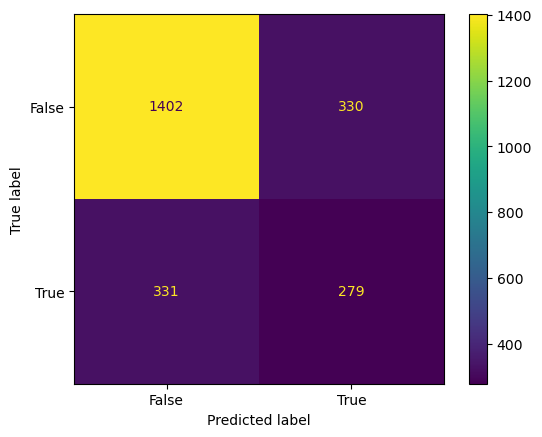

[ 1146.0019251   -178.75788072    40.80523279  1084.00447738
   578.00165927   -77.99731526   272.0093224   1852.00269562
  1024.00723969   510.00912615 -3637.990312   -1629.99199018
   924.0011379    -41.99659355 20702.55218917   153.55692551
  1197.22213455   208.00099298 -1571.99660811  -192.41292413
   -25.99911519   670.00606255  3288.0091276    215.80757723
  -685.99128172]


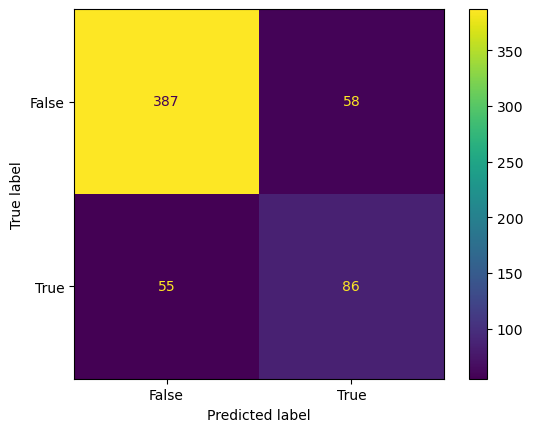

[-1. -1. -1. ... -1.  1. -1.]
[ 1. -1. -1. ... -1. -1. -1.]


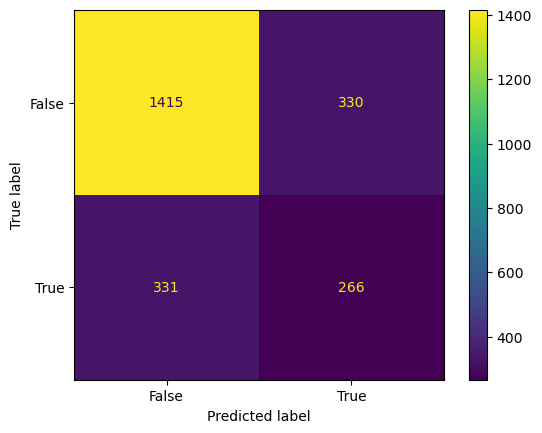

[-3.41799986e+03 -6.62139482e+01 -9.59305901e+00  7.58003594e+02
  2.49000711e+03 -1.33998242e+02  1.09600319e+03 -1.19799376e+03
  7.68007065e+02  6.20003540e+02 -2.50399971e+03 -8.05997989e+02
  7.14003930e+02  1.56003602e+02  2.12854425e+04  1.67105642e+02
  9.13189369e+02  3.70002784e+02  5.32003215e+02  4.99274364e+01
 -8.19970686e+01  4.60002523e+02 -7.25399404e+03  7.49063019e+02
  4.12004429e+02]


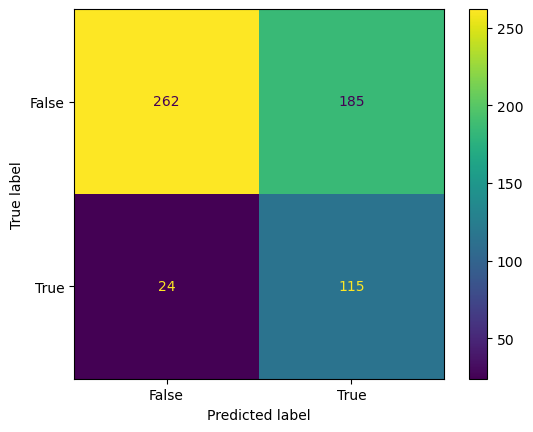

[-1. -1.  1. ... -1. -1. -1.]
[-1. -1.  1. ...  1. -1. -1.]


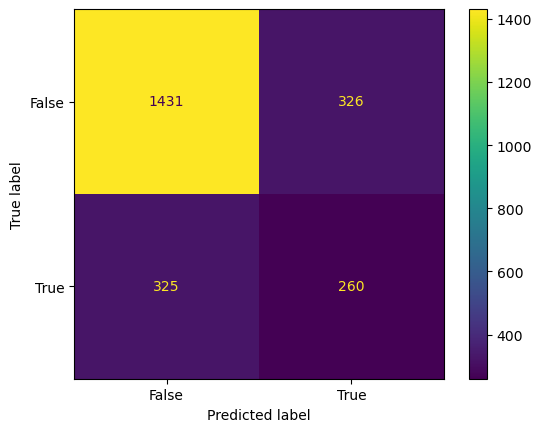

[-7.45995018e+02 -2.67759501e+02  2.08029772e+01  5.42001926e+02
  5.30006810e+02 -4.39996322e+01  8.26000361e+02  4.58400300e+03
  1.42400886e+03  1.55400702e+03 -1.00399319e+03  9.88008171e+02
 -1.03599011e+03 -5.99901117e+01  1.43046433e+04 -1.47440276e+03
  1.66328489e+03  4.98001455e+02  1.72002097e+02 -1.33115764e+02
 -1.65991657e+02  3.28000809e+02  1.10660068e+04  1.02930118e+03
  6.00887165e+00]


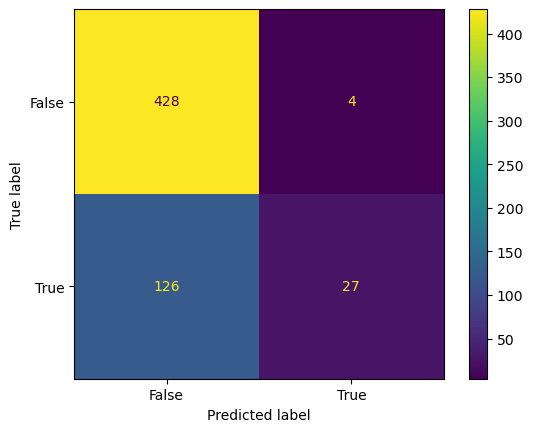

[ 1. -1. -1. ... -1. -1. -1.]
[-1. -1. -1. ... -1. -1. -1.]


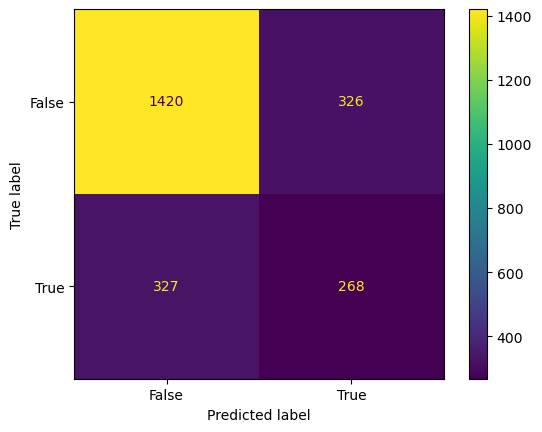

[-4.65999474e+03 -7.29976065e+01 -7.99704655e+00  6.80006713e+02
 -9.59996391e+01  2.86008515e+02 -2.49997269e+02  4.53200331e+03
  1.90009346e+02  5.66008951e+02 -1.67799232e+03  4.66003186e+02
 -9.59994747e+02 -3.79917414e+01  1.97256792e+04 -1.87745505e+01
  1.39488576e+03  9.80037153e+01 -7.99911535e+01 -8.31100700e+01
  5.44595194e-03  3.36002250e+02 -1.05199947e+04  8.53928181e+02
  1.17600855e+03]


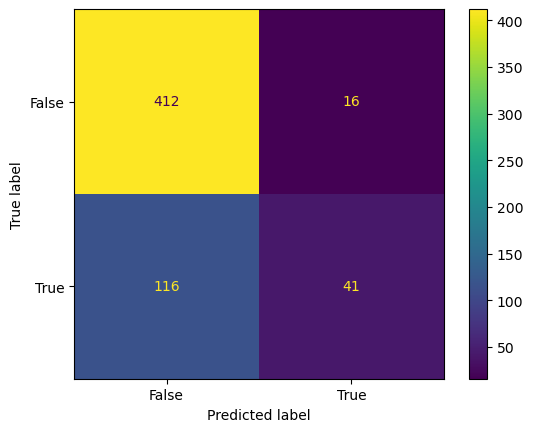

[-1. -1.  1. ... -1. -1. -1.]
[-1.  1. -1. ... -1. -1. -1.]


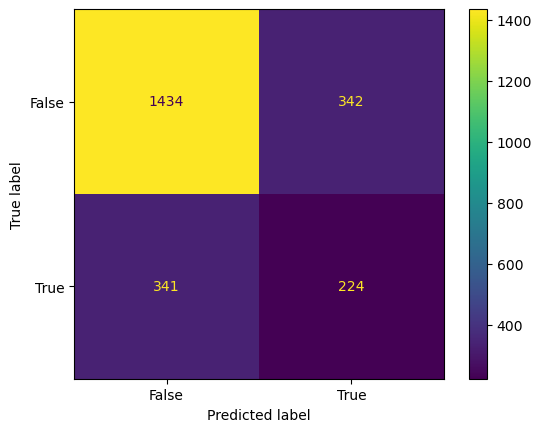

[-1.17199474e+03 -1.66895672e+02 -8.51945153e+01 -5.35999471e+02
  3.50005027e+02  3.44006374e+02  1.20400059e+03  1.36400067e+03
 -7.03993014e+02 -3.85995115e+02 -2.33799557e+03 -9.55992582e+02
  1.15800581e+03 -1.79972169e+01  2.01559224e+04  8.31267264e+02
  1.39328581e+03  5.42008436e+02 -7.09999635e+02 -4.74916111e+01
 -6.59985012e+01  6.12005232e+02 -5.19599633e+03  7.16481447e+02
 -3.43996441e+02]


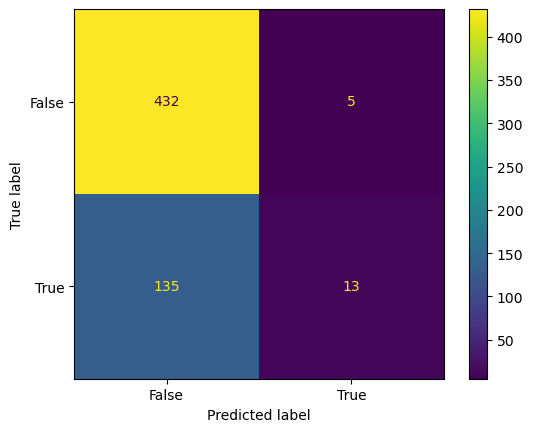

In [10]:
for i in range(5):
    optimal_weight = model_training(X1_train[i],Y1_train[i],i)
    print(optimal_weight)
    model_testing(X1_test[i],Y1_test[i],optimal_weight,i)